In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation
from tensorflow.keras import optimizers, Input, Model, metrics
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
import shutil


In [53]:
t_model = VGG16(include_top=True, )
t_model.trainable = False

cd_model = Sequential()
cd_model.add(t_model)
cd_model.add(Flatten())
cd_model.add(Dense(64, activation='relu'))
cd_model.add(Dropout(0.5))
cd_model.add(Dense(1, activation='sigmoid'))

t_model.summary()
# cd_model.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [48]:
path = "data/dogs-vs-cats/train/"

for i in os.listdir(path+'train'):
    catagory = i.split(".")[0]
    if catagory == "cat":
        os.makedirs(path + 'cats', exist_ok=True)
        shutil.move(path + 'train/' + i, path + 'cats')
    else:
        os.makedirs(path + 'dogs', exist_ok=True)
        shutil.move(path + 'train/' + i, path + 'dogs')
os.removedirs(path+'train')

In [47]:
# os.makedirs(path + 'train', exist_ok=True)

# for i in os.listdir(path + 'cats'):
#     shutil.move(path + 'cats/' + i, path + 'train')

# for i in os.listdir(path + 'dogs'):
#     shutil.move(path + 'dogs/' + i, path + 'train')
    
# os.removedirs(path+'cats')
# os.removedirs(path+'dogs')

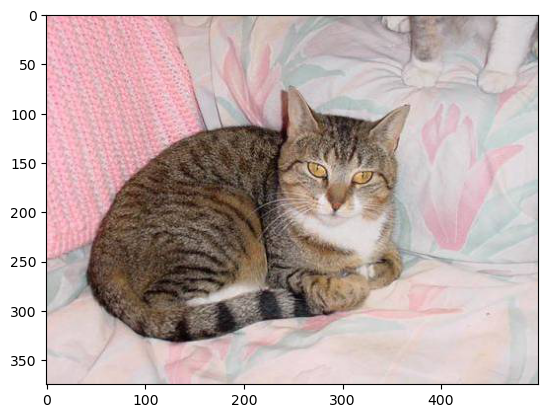

In [51]:

num = random.randint(1, 12499)
# img = np.asarray(PIL.Image.open("data/dogs-vs-cats/train/dogs/dog.{}.jpg".format(num)))
img = np.asarray(PIL.Image.open("data/dogs-vs-cats/train/cats/cat.{}.jpg".format(num)))
plt.imshow(img)

In [ ]:
x_train

In [61]:
train_datagen = ImageDataGenerator(rescale=1./255,      # 각도 기울이기
                                   rotation_range=15,   # 정규화
                                   shear_range=0.2,     # 이미지 기울이기
                                   zoom_range=0.2,      # 확대
                                   horizontal_flip=True,# 좌우 반전
                                   fill_mode='nearest', # 이미지 빈 공간 채우기
                                   width_shift_range=0.1,   # 수평 이동
                                   height_shift_range=0.1)  # 수직 이동

train_gen = train_datagen.flow_from_directory(path,
                                              class_mode='binary',
                                              target_size=(224, 224),
                                              batch_size=32, shuffle=True)

test_data_gn = ImageDataGenerator(rescale=1./255)
test_gen = test_data_gn.flow_from_directory(path, target_size=(224,224), batch_size=32,
                                            class_mode='binary')


Found 17137 images belonging to 2 classes.
Found 17137 images belonging to 2 classes.


In [62]:

cd_model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate = .0002), metrics=['accuracy'])

early_stopping = EarlyStopping(patience=3)

cd_model.fit(train_gen, batch_size=128, epochs=200, validation_data=test_gen, callbacks=[early_stopping])


Epoch 1/200
245/536 [============>.................] - ETA: 31:56 - loss: 0.6491 - accuracy: 0.7301

In [ ]:
pred ='data/dogs-vs-cats/cat_dog_pred'
for i in pred:
    cd_model.predict(pred[i])
